# nbrefactor
---

_Refactors Jupyter Notebooks into Python Packages and Modules_

## Set Up

In [1]:
# IMPORTS

import os
import sys

sys.path.append(os.path.abspath(os.path.join('..')))  # for parent-level relative import

from processor import process_notebook



# CONSTANTS & PATHS

SAMPLE_NAME     = 'all_features'  # possible options ['all_features', 'HiveNAS', 'CS231n_colab', 'markdown_only']
NOTEBOOK_PATH   = f'./examples/sample_{SAMPLE_NAME}.ipynb'
PLOTS_PATH      = './examples/plots/'
PLOTS_FORMAT    = 'pdf'



## Processing / Refactoring

In [11]:
import re
print(re.compile(r'\$\b(?P<command>\w+(?:-\w+)*)(?:=(?P<value>.*?))(?=\s)', re.).search('<!-- $declare-module=visualize_img_aug -->'))

<re.Match object; span=(5, 38), match='$declare-module=visualize_img_aug'>


In [2]:

# extract filename and infer output path from the notebook path given in 1.1 Set Up
notebook_filename = os.path.splitext(os.path.basename(NOTEBOOK_PATH))[0]  # filename w/o extension
refactored_path = f'./examples/results/{notebook_filename}_refactored/'

# NBRefactor entry point
root_node = process_notebook(NOTEBOOK_PATH, refactored_path)



## Imports
## Utils

---
This is a **Markdown Command** example

_(double-click me to preview the command)_

<!---
Commands have a leading `$` and could be used to amend the generated module tree's structure.
This particular command renames this package from "Utils" to "utilities"

$node=utilities
-->
### File Utils

<!-- no commands here, this should be refactored to `./utilities/file_utils.py` -->
### Image Utils

---
*Uncommented commands also work!*

$module=image_utilities
### Plotting Utils
#### Visualize Minimax

_(double-click me to preview the command)_

<!-- $declare-module=visualize_img_aug -->
## Image Augmentation at Work!


_(double-click me to preview the command)_

<!-- $node=image_augmentation -->
### Img Aug
### Plotting Img Aug
#### Cutout Plot
#### Sat. Plot
#### Contrast Plot
## Game Time!

_(double-click me to preview the command)_

<!-- $package=game -->
### TicTacToe with Minimax

This package demonstrates a TicTacToe game where the opponent uses the Minimax alg

## Visualizing Generated Module Tree

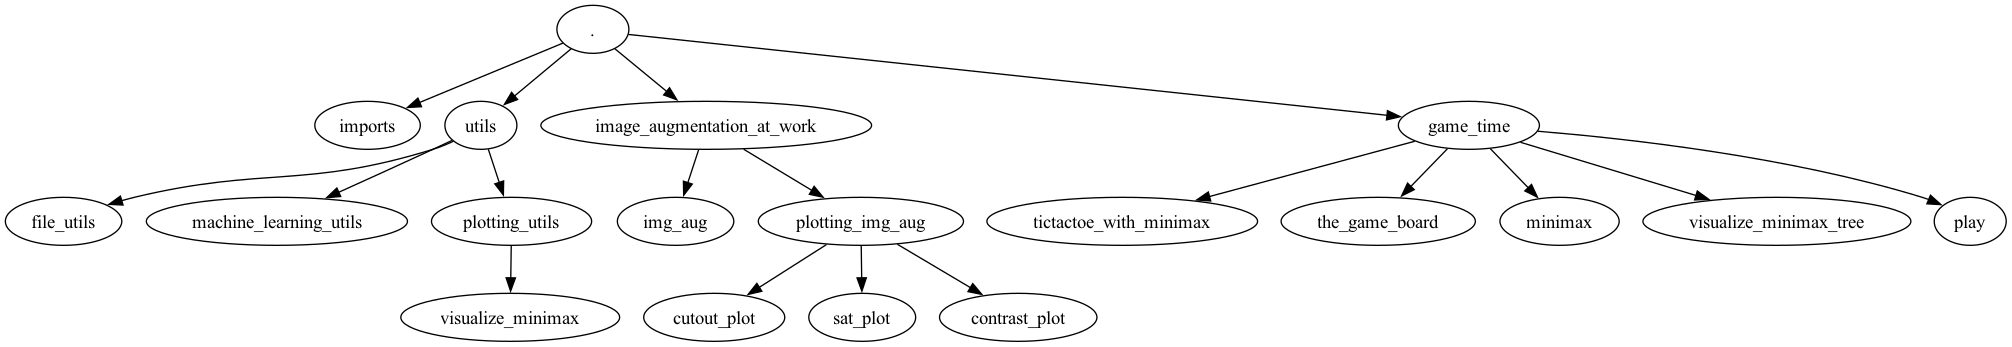

In [3]:
from visualization import plot_module_tree
from fileops import ensure_dir

from IPython.display import display, Image

# ensure existence of the output path
ensure_dir(PLOTS_PATH)
plot_file_path = os.path.join(PLOTS_PATH, notebook_filename)

# init the modules DAG
dag = plot_module_tree(root_node, format=PLOTS_FORMAT)

# render to file
dag.render(plot_file_path, cleanup=True)

# render to IPython Display
img_data = dag.pipe(format='png')
display(Image(img_data))

